# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# initiazlize 
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        


Processing Record 1 of Set 1 : sao joao da barra
Processing Record 2 of Set 1 : mahebourg
Processing Record 3 of Set 1 : zhigalovo
Processing Record 4 of Set 1 : hilo
Processing Record 5 of Set 1 : kaitangata
Processing Record 6 of Set 1 : arraial do cabo
Processing Record 7 of Set 1 : saint-joseph
Processing Record 8 of Set 1 : cape town
City not found. Skipping...
Processing Record 9 of Set 1 : qaanaaq
Processing Record 10 of Set 1 : punta arenas
Processing Record 11 of Set 1 : alyangula
Processing Record 12 of Set 1 : poronaysk
Processing Record 13 of Set 1 : puerto ayora
Processing Record 14 of Set 1 : ushuaia
Processing Record 15 of Set 1 : robertsport
Processing Record 16 of Set 1 : mar del plata
Processing Record 17 of Set 1 : kapaa
Processing Record 18 of Set 1 : port alfred
Processing Record 19 of Set 1 : komsomolskiy
Processing Record 20 of Set 1 : okha
Processing Record 21 of Set 1 : albany
Processing Record 22 of Set 1 : ahipara
Processing Record 23 of Set 1 : bandarbeyla
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

weather_dict


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,São João da Barra,90,BR,1612538589,69,-21.6403,-41.0511,82.40,10.20
1,Mahébourg,40,MU,1612538589,69,-20.4081,57.7000,82.40,13.80
2,Zhigalovo,100,RU,1612538589,91,54.8097,105.1578,4.44,3.58
3,Hilo,1,US,1612538539,67,19.7297,-155.0900,63.00,6.91
4,Kaitangata,95,NZ,1612538589,92,-46.2817,169.8464,46.51,5.23
...,...,...,...,...,...,...,...,...,...
575,Pinotepa Nacional,29,MX,1612538659,69,16.3167,-98.0167,79.16,3.51
576,Jiwani,0,PK,1612538659,46,25.0500,61.7417,70.68,9.93
577,San Jerónimo,100,PE,1612538659,64,-11.9472,-75.2829,54.66,1.48
578,Batāla,0,IN,1612538659,82,31.8186,75.2028,53.60,4.99


In [8]:
# Save city data into a csv file
weather_dict.to_csv("output_data/cities.csv", index = False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#check if there are any cities with >100% humidity
test_stats = weather_dict["Humidity"].describe(include = "all")
test_stats




count    580.000000
mean      71.451724
std       21.822634
min        8.000000
25%       61.000000
50%       78.000000
75%       87.000000
max      100.000000
Name: Humidity, dtype: float64

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

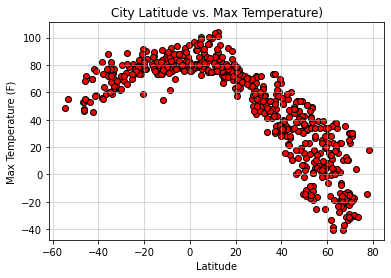

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "red", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")



## Latitude vs. Humidity Plot

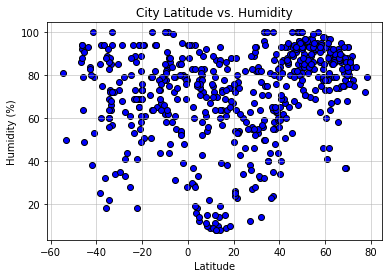

In [13]:

# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")


## Latitude vs. Cloudiness Plot

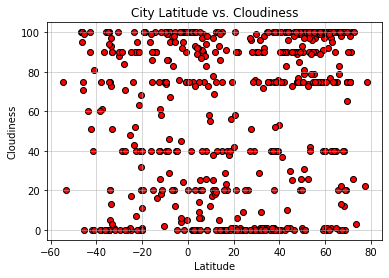

In [14]:
# Create Latitude vs. Cloudniness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "red", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")


## Latitude vs. Wind Speed Plot

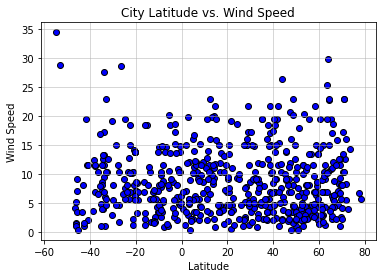

In [15]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed.png")

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]
    


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

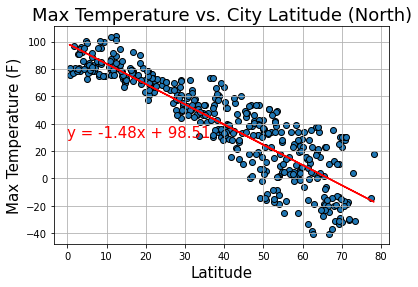

In [17]:
#setup linear regression and line equation
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

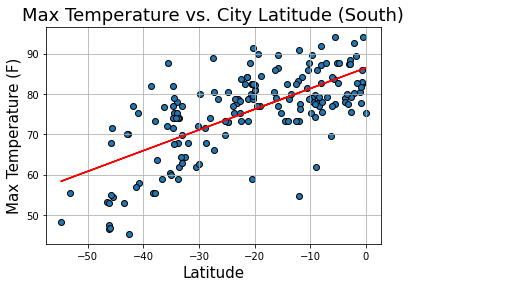

In [18]:
#setup linear regression and line equation
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Max Temperature vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Max Temperature (F)',size=15)
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

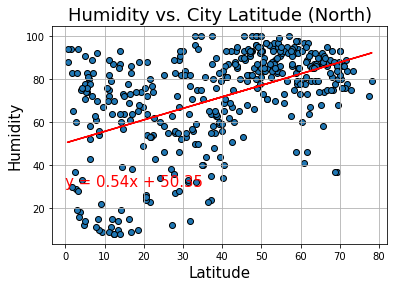

In [19]:
#setup linear regression and line equation
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity',size=15)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

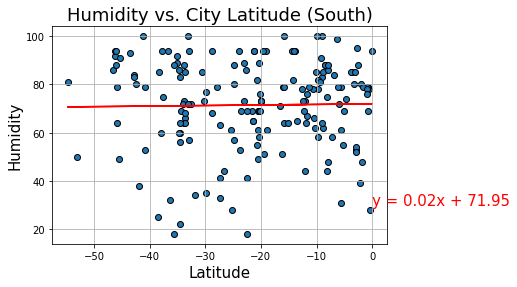

In [20]:
#setup linear regression and line equation
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity',size=15)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

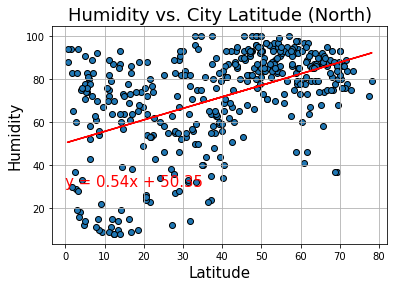

In [21]:
#setup linear regression and line equation
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Humidity vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Humidity',size=15)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

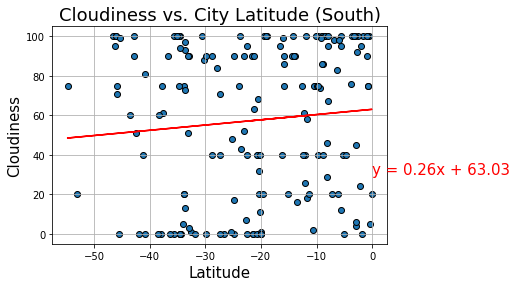

In [22]:
#setup linear regression and line equation
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Cloudiness vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Cloudiness',size=15)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

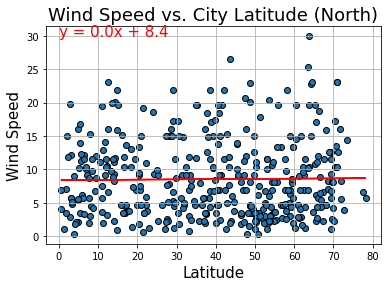

In [23]:
#setup linear regression and line equation
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. City Latitude (North)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed',size=15)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

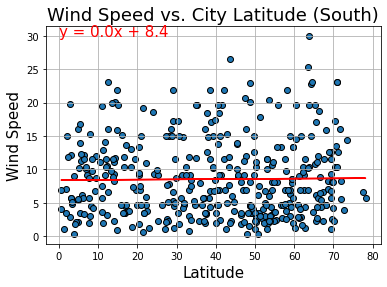

In [24]:
#setup linear regression and line equation
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_values,y_values,marker='o',edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, xy=(0,30),fontsize=15,color='red')
plt.grid()
plt.title('Wind Speed vs. City Latitude (South)',size=18)
plt.xlabel('Latitude',size=15)
plt.ylabel('Wind Speed',size=15)
plt.show()